In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import pandas as pd
import numpy as np
from src.vae_torch import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of src.vae_torch failed: Traceback (most recent call last):
  File "c:\Users\32mor\OneDrive\Documents\IPP M2\MCMC\HACK-1-THON\venv_data_gen\lib\site-packages\IPython\extensions\autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\32mor\OneDrive\Documents\IPP M2\MCMC\HACK-1-THON\venv_data_gen\lib\site-packages\IPython\extensions\autoreload.py", line 484, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\32mor\OneDrive\Documents\IPP M2\MCMC\HACK-1-THON\venv_data_gen\lib\site-packages\IPython\extensions\autoreload.py", line 381, in update_generic
    update(a, b)
  File "c:\Users\32mor\OneDrive\Documents\IPP M2\MCMC\HACK-1-THON\venv_data_gen\lib\site-packages\IPython\extensions\autoreload.py", line 333, in update_class
    if update_generic(old_obj, new_obj):
  File "c:\Users\32mor\OneDrive\Documents\IPP M2\MCMC\HACK-1-THON\venv_data_gen\lib\site-packages\IPython\extensions\autoreload.py", line 381, in update_gener

# Definition des hyperparamètres pour l'entrainement

In [ ]:
batch_size = 256
learning_rate = 0.0001
middle_layer_size = 100
input_size = 28*28*1
latent_dim = 20
n_epochs = 100

# Entrainement et Résultats

## VAE

In [ ]:
model = VAE(input_size,middle_layer_size, latent_dim)

[autoreload of src.vae_torch failed: Traceback (most recent call last):
  File "c:\Users\32mor\OneDrive\Documents\IPP M2\MCMC\HACK-1-THON\venv_data_gen\lib\site-packages\IPython\extensions\autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\32mor\OneDrive\Documents\IPP M2\MCMC\HACK-1-THON\venv_data_gen\lib\site-packages\IPython\extensions\autoreload.py", line 484, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\32mor\OneDrive\Documents\IPP M2\MCMC\HACK-1-THON\venv_data_gen\lib\site-packages\IPython\extensions\autoreload.py", line 381, in update_generic
    update(a, b)
  File "c:\Users\32mor\OneDrive\Documents\IPP M2\MCMC\HACK-1-THON\venv_data_gen\lib\site-packages\IPython\extensions\autoreload.py", line 333, in update_class
    if update_generic(old_obj, new_obj):
  File "c:\Users\32mor\OneDrive\Documents\IPP M2\MCMC\HACK-1-THON\venv_data_gen\lib\site-packages\IPython\extensions\autoreload.py", line 381, in update_gener

In [ ]:
mnist_trainset = Dataset("c:\\Users\\32mor\\OneDrive\\Documents\\IPP M2\\DL2\\DL_2_project\\tristan\\data\\mnist_train.csv")
mnist_testset = Dataset("c:\\Users\\32mor\\OneDrive\\Documents\\IPP M2\\DL2\\DL_2_project\\tristan\\data\\mnist_test.csv")
mnist_train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True,
                                                    drop_last=True)
mnist_test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True,
                                                    drop_last=True)

In [34]:
data, labels = next(iter(mnist_train_loader))

In [35]:
train_model(model, learning_rate, mnist_train_loader,batch_size, n_epochs)

tensor(0.7718, grad_fn=<MaxBackward1>)
tensor(0.7627, grad_fn=<MaxBackward1>)
tensor(0.7845, grad_fn=<MaxBackward1>)
tensor(0.8217, grad_fn=<MaxBackward1>)
tensor(0.9593, grad_fn=<MaxBackward1>)
tensor(0.9996, grad_fn=<MaxBackward1>)
tensor(0.9326, grad_fn=<MaxBackward1>)
tensor(0.9381, grad_fn=<MaxBackward1>)
tensor(0.9131, grad_fn=<MaxBackward1>)
tensor(0.9326, grad_fn=<MaxBackward1>)
tensor(0.9999, grad_fn=<MaxBackward1>)
tensor(0.9477, grad_fn=<MaxBackward1>)
tensor(0.9222, grad_fn=<MaxBackward1>)
tensor(0.9232, grad_fn=<MaxBackward1>)
tensor(0.9456, grad_fn=<MaxBackward1>)
tensor(0.9642, grad_fn=<MaxBackward1>)
tensor(0.9855, grad_fn=<MaxBackward1>)
tensor(0.8857, grad_fn=<MaxBackward1>)
tensor(0.8682, grad_fn=<MaxBackward1>)
tensor(0.8451, grad_fn=<MaxBackward1>)
tensor(0.9138, grad_fn=<MaxBackward1>)
tensor(0.8608, grad_fn=<MaxBackward1>)
tensor(0.8854, grad_fn=<MaxBackward1>)
tensor(0.8235, grad_fn=<MaxBackward1>)
tensor(0.8272, grad_fn=<MaxBackward1>)
tensor(0.8438, grad_fn=<M

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid


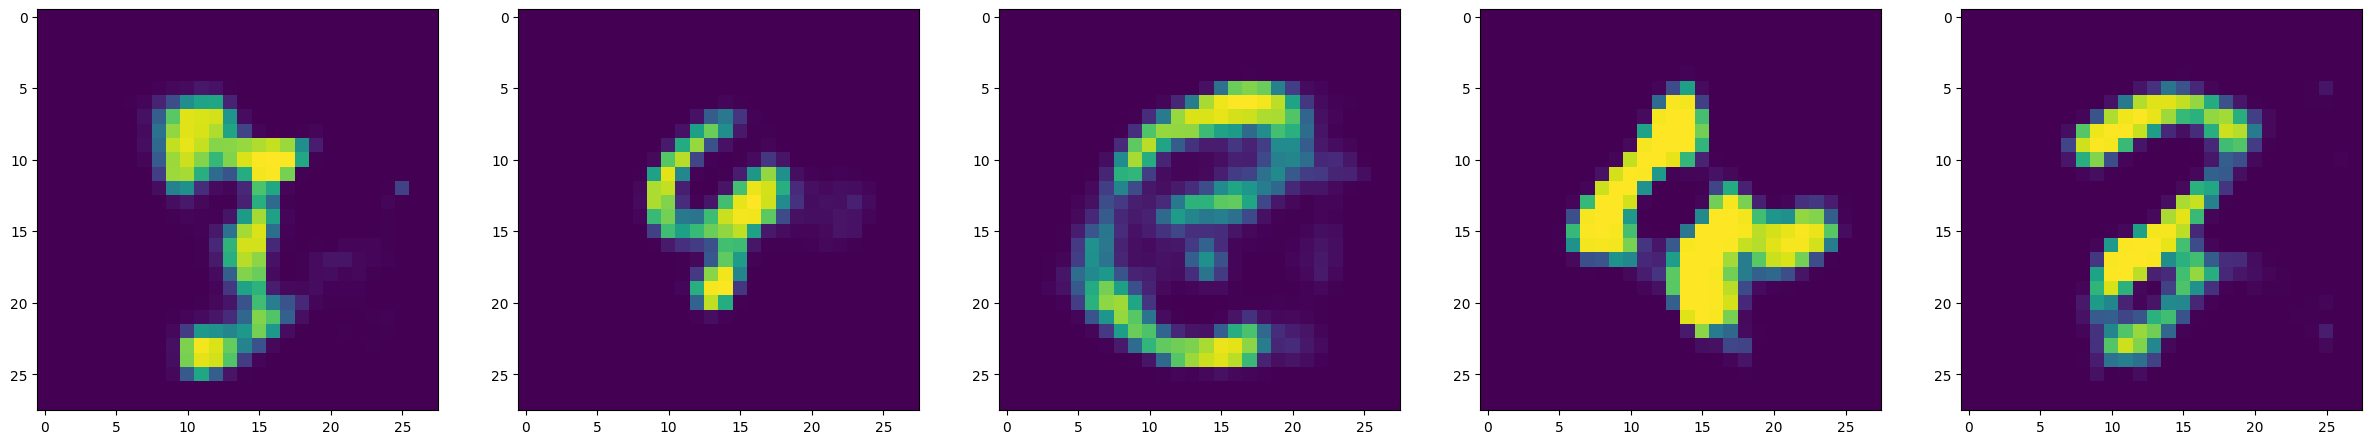

In [ ]:
images = generate_data(model, 5)
fig, axes = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    axes[i].imshow(images[i].view(28,28,1).detach().numpy())
plt.savefig("images_VAE.png")

## DBN

In [ ]:
from src.dbn import DBN
from src.data import lire_mnist

X_train, y_train, X_test, y_test = lire_mnist("data/mnist_train.csv", "data/mnist_test.csv")
model = DBN([784, 100, 100])

In [ ]:
model.train(X_train,0.1,batch_size , 100)

Epoch 0, erreur quadratique moyenne de reconstruction : 0.071109
Epoch 1, erreur quadratique moyenne de reconstruction : 0.059042
Epoch 2, erreur quadratique moyenne de reconstruction : 0.053668
Epoch 3, erreur quadratique moyenne de reconstruction : 0.049872
Epoch 4, erreur quadratique moyenne de reconstruction : 0.047089
Epoch 5, erreur quadratique moyenne de reconstruction : 0.044864
Epoch 6, erreur quadratique moyenne de reconstruction : 0.043061
Epoch 7, erreur quadratique moyenne de reconstruction : 0.041588
Epoch 8, erreur quadratique moyenne de reconstruction : 0.040321
Epoch 9, erreur quadratique moyenne de reconstruction : 0.039236
Epoch 10, erreur quadratique moyenne de reconstruction : 0.038261
Epoch 11, erreur quadratique moyenne de reconstruction : 0.037407
Epoch 12, erreur quadratique moyenne de reconstruction : 0.036652
Epoch 13, erreur quadratique moyenne de reconstruction : 0.035946
Epoch 14, erreur quadratique moyenne de reconstruction : 0.035339
Epoch 15, erreur qua

MemoryError: Unable to allocate 5.98 MiB for an array with shape (1000, 784) and data type float64

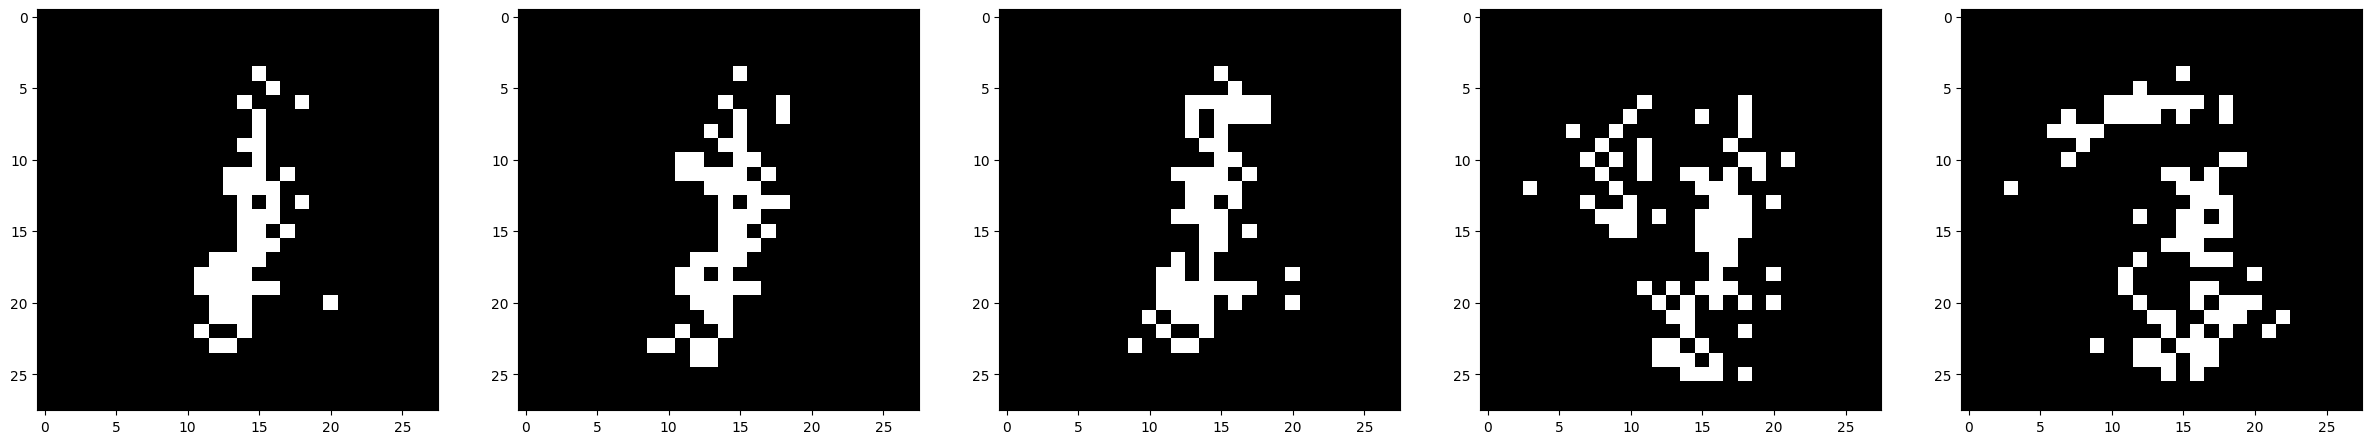

In [ ]:
images_dbn = model.generer_image(30, 10)
fig, axes = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    axes[i].imshow(images_dbn[i].reshape(28,28,1), cmap='gray')
plt.savefig("dbn_mnist_images_high_lr.png")

## RBM

In [11]:
from src.rbm import RBM
from src.data import lire_alpha_digits
from src.utils import display_alpha_digits

In [12]:
rbm_mnist = RBM(784,200)

In [13]:

rbm_mnist.train(X_train,learning_rate, batch_size, n_epochs)

Epoch 0, erreur quadratique moyenne de reconstruction : 0.087530
Epoch 1, erreur quadratique moyenne de reconstruction : 0.082048
Epoch 2, erreur quadratique moyenne de reconstruction : 0.074179
Epoch 3, erreur quadratique moyenne de reconstruction : 0.067840
Epoch 4, erreur quadratique moyenne de reconstruction : 0.063535
Epoch 5, erreur quadratique moyenne de reconstruction : 0.060558
Epoch 6, erreur quadratique moyenne de reconstruction : 0.058210
Epoch 7, erreur quadratique moyenne de reconstruction : 0.056376
Epoch 8, erreur quadratique moyenne de reconstruction : 0.054810
Epoch 9, erreur quadratique moyenne de reconstruction : 0.053351
Epoch 10, erreur quadratique moyenne de reconstruction : 0.052006
Epoch 11, erreur quadratique moyenne de reconstruction : 0.050795
Epoch 12, erreur quadratique moyenne de reconstruction : 0.049725
Epoch 13, erreur quadratique moyenne de reconstruction : 0.048737
Epoch 14, erreur quadratique moyenne de reconstruction : 0.047814
Epoch 15, erreur qua

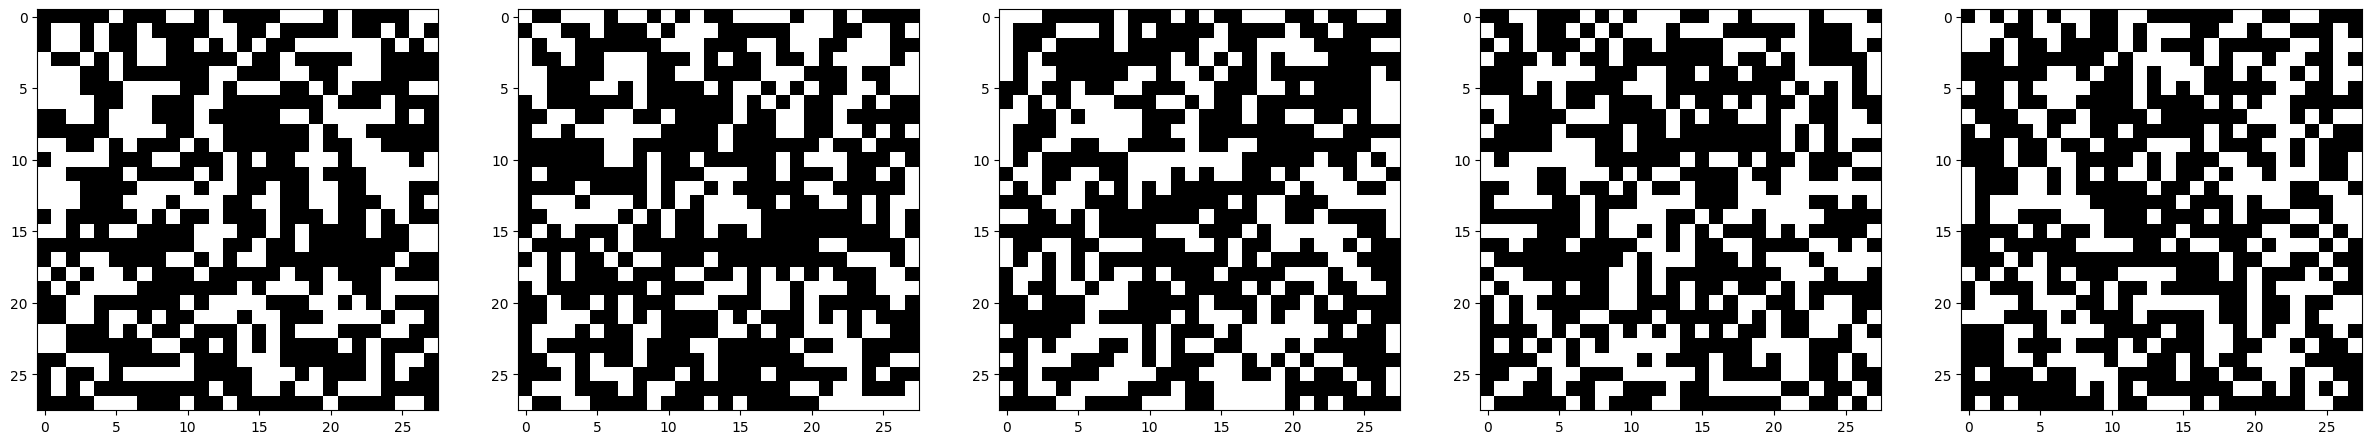

In [14]:
images_rbm = rbm_mnist.generer_image(10, 5)
fig, axes = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    axes[i].imshow(images_rbm[i].reshape(28,28,1),cmap="gray")
plt.savefig("images_rbm_mnist.png")

In [56]:
dbn_mnist = DBN([784,150, 150])
dbn_mnist.train(X_train, learning_rate, batch_size, n_epochs)

Epoch 0, erreur quadratique moyenne de reconstruction : 0.084122
Epoch 1, erreur quadratique moyenne de reconstruction : 0.069620
Epoch 2, erreur quadratique moyenne de reconstruction : 0.062581
Epoch 3, erreur quadratique moyenne de reconstruction : 0.058296
Epoch 4, erreur quadratique moyenne de reconstruction : 0.055450
Epoch 5, erreur quadratique moyenne de reconstruction : 0.053049
Epoch 6, erreur quadratique moyenne de reconstruction : 0.050925
Epoch 7, erreur quadratique moyenne de reconstruction : 0.049161
Epoch 8, erreur quadratique moyenne de reconstruction : 0.047611
Epoch 9, erreur quadratique moyenne de reconstruction : 0.046238
Epoch 10, erreur quadratique moyenne de reconstruction : 0.045002
Epoch 11, erreur quadratique moyenne de reconstruction : 0.043866
Epoch 12, erreur quadratique moyenne de reconstruction : 0.042852
Epoch 13, erreur quadratique moyenne de reconstruction : 0.041922
Epoch 14, erreur quadratique moyenne de reconstruction : 0.041055
Epoch 15, erreur qua

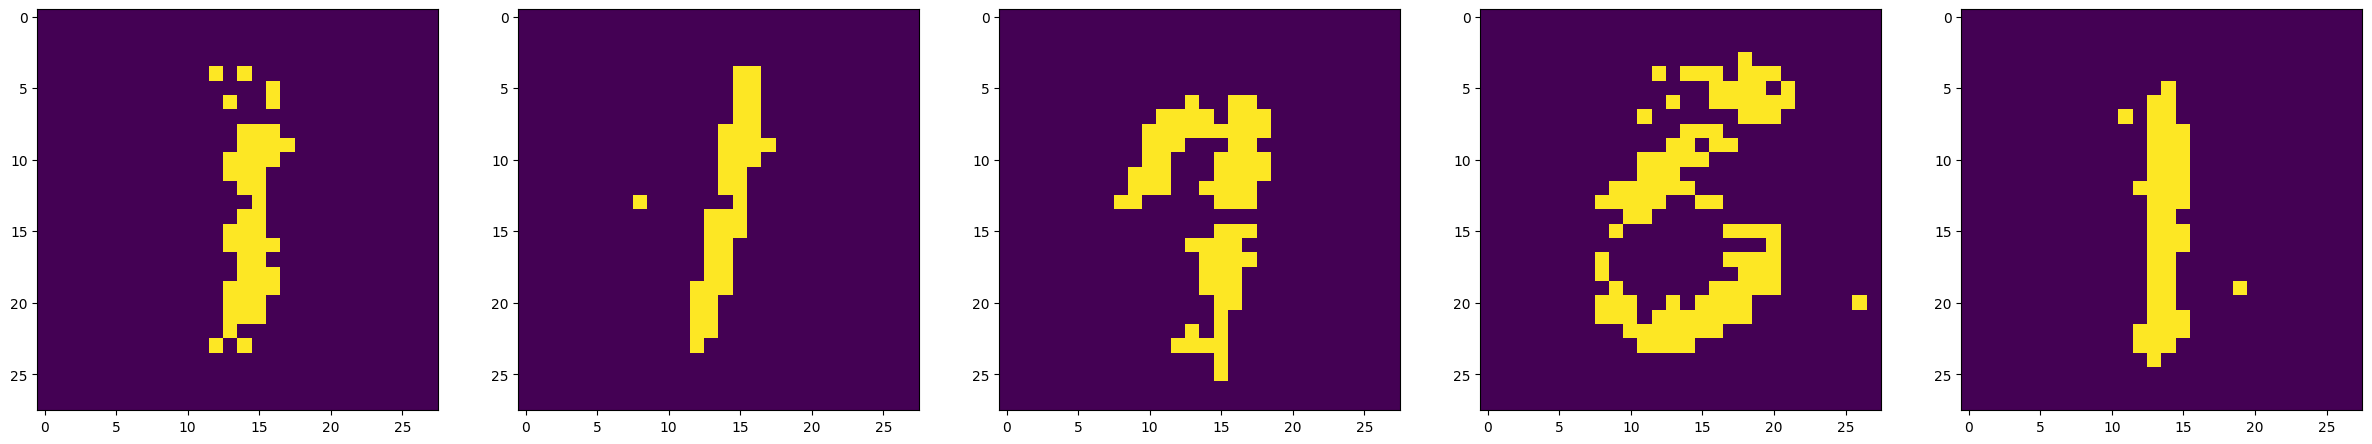

In [63]:
images_dbn = dbn_mnist.generer_image(30, 10)


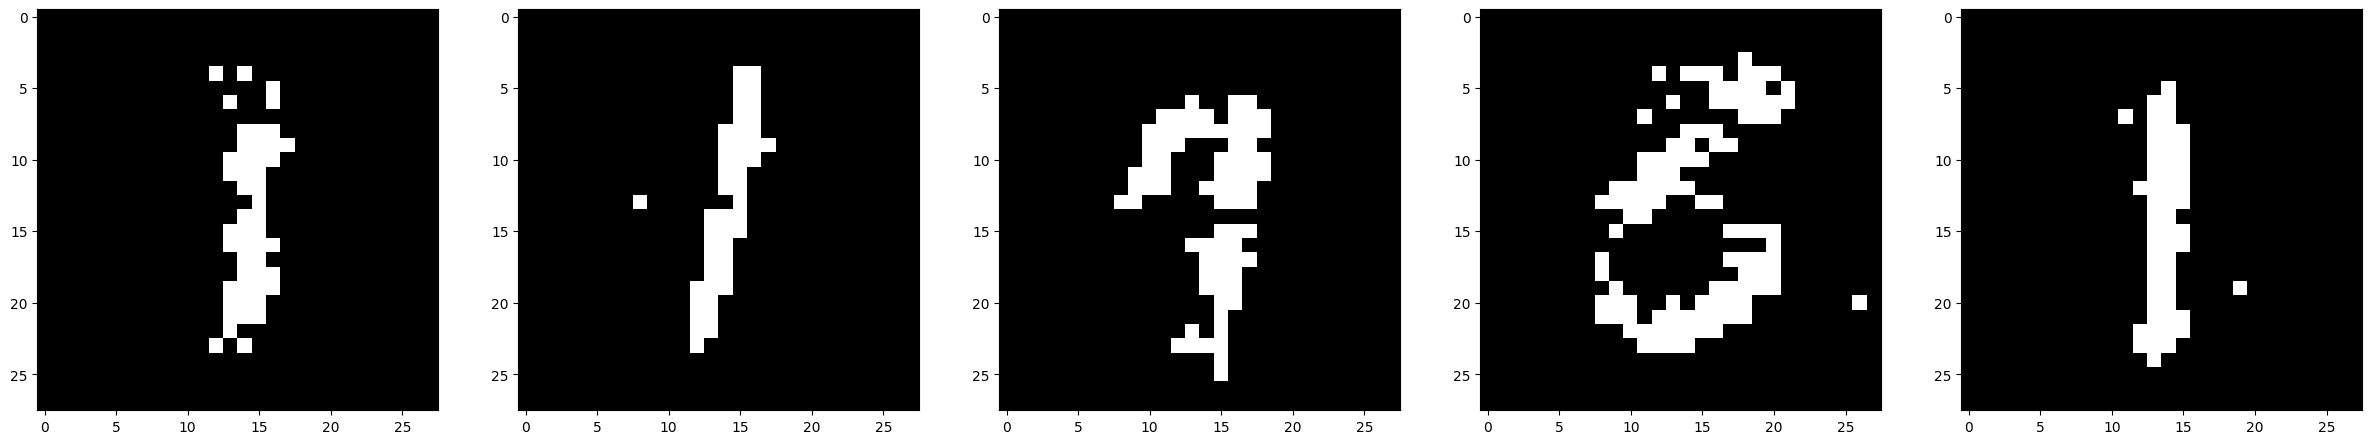

In [69]:
fig, axes = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    axes[i].imshow(images_dbn[i].reshape(28,28,1), cmap='gray')
plt.savefig("dbn_mnist_images.png")